# Data Cleaning part II

After gathering and combining the tweets, it was important to remove null values in order to create a VADER-based sentiment analysis for data exploration.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:

np.random.seed(1234)

DEPRES_NROWS = 3200
RANDOM_NROWS = 12000
MAX_SEQUENCE_LENGTH = 140
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 300
TRAIN_SPLIT = 0.6
TEST_SPLIT = 0.2
LEARNING_RATE = 0.1
EPOCHS= 10

In [ ]:
import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/100/depressive_tweets_processed.csv')

In [ ]:
DEPRESSIVE_TWEETS_CSV = '/content/drive/MyDrive/100/depressive_tweets_processed.csv'
#DEPRESSIVE_TWEETS_CSV = '/content/drive/MyDrive/depressive_tweets.csv'
RANDOM_TWEETS_CSV = '/content/drive/MyDrive/43/Sentiment Analysis Dataset 2.csv'

In [ ]:
df2 = pd.read_csv(DEPRESSIVE_TWEETS_CSV, sep = '|', header = None, usecols = range(0,9), nrows = DEPRES_NROWS)

In [ ]:
df2.head()

,0,1,2,3,4,5,6,7,8
0,989292962323615744,2018-04-25,23:59:57,Eastern Standard Time,whosalli,The lack of this understanding is a small but ...,1,0,3
1,989292959844663296,2018-04-25,23:59:56,Eastern Standard Time,estermnunes,i just told my parents about my depression and...,1,0,2
2,989292951716155392,2018-04-25,23:59:54,Eastern Standard Time,TheAlphaAries,depression is something i don't speak about ev...,0,0,0
3,989292873664393218,2018-04-25,23:59:35,Eastern Standard Time,_ojhodgson,Made myself a tortilla filled with pb&j. My de...,1,0,0
4,989292856119472128,2018-04-25,23:59:31,Eastern Standard Time,DMiller96371630,@WorldofOutlaws I am gonna need depression med...,0,0,0


In [ ]:
df_new['text'] = df_new['clean_tweet']

In [ ]:
df_new['text']

0       The lack understanding small significant part ...
1       told parents depression hard get gen x people ...
2       depression something speak even going also dou...
3       Made tortilla filled pb&j. My depression cured...
4       @WorldofOutlaws I gonna need depression meds s...
                              ...                        
2340    Many sufferers depression sad; feel nothing al...
2341    No Depression G Herbo mood on, i'm done stress...
2342    What depression succumbs brain makes feel like...
2343    Ketamine Nasal Spray Shows Promise Against Dep...
2344       dont mistake bad day depression! everyone 'em!
Name: text, Length: 2313, dtype: object

In [ ]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
all_tweets_no_urls = [remove_url(tweet) for tweet in df_new['text']]
all_tweets_no_urls[:5]

['The lack understanding small significant part causes anxiety depression feel incredibly lonely Its soooo easy compare Its easy invalidate that',
 'told parents depression hard get gen x people understand something control time cure walk keeping mind busy',
 'depression something speak even going also double edged sword love every race even white people done much cant hate all grandma legit white tf hate dislike people though',
 'Made tortilla filled pbj My depression cured Olivia1 depression0',
 'WorldofOutlaws I gonna need depression meds soon rainouts spinning equilibrium Emoji Pouting face Mother Nature mean BTH Emoji Face symbols mouth']

In [ ]:
all_tweets_no_urls[0].split()

['The',
 'lack',
 'understanding',
 'small',
 'significant',
 'part',
 'causes',
 'anxiety',
 'depression',
 'feel',
 'incredibly',
 'lonely',
 'Its',
 'soooo',
 'easy',
 'compare',
 'Its',
 'easy',
 'invalidate',
 'that']

In [ ]:
all_tweets_no_urls[0].lower().split()

['the',
 'lack',
 'understanding',
 'small',
 'significant',
 'part',
 'causes',
 'anxiety',
 'depression',
 'feel',
 'incredibly',
 'lonely',
 'its',
 'soooo',
 'easy',
 'compare',
 'its',
 'easy',
 'invalidate',
 'that']

In [ ]:

all_words_no_urls = list(itertools.chain(*words_in_tweet))


counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('depression', 2299),
 ('i', 937),
 ('anxiety', 360),
 ('im', 263),
 ('like', 201),
 ('emoji', 192),
 ('face', 165),
 ('people', 161),
 ('it', 136),
 ('the', 135),
 ('know', 131),
 ('life', 125),
 ('get', 118),
 ('one', 118),
 ('you', 113)]

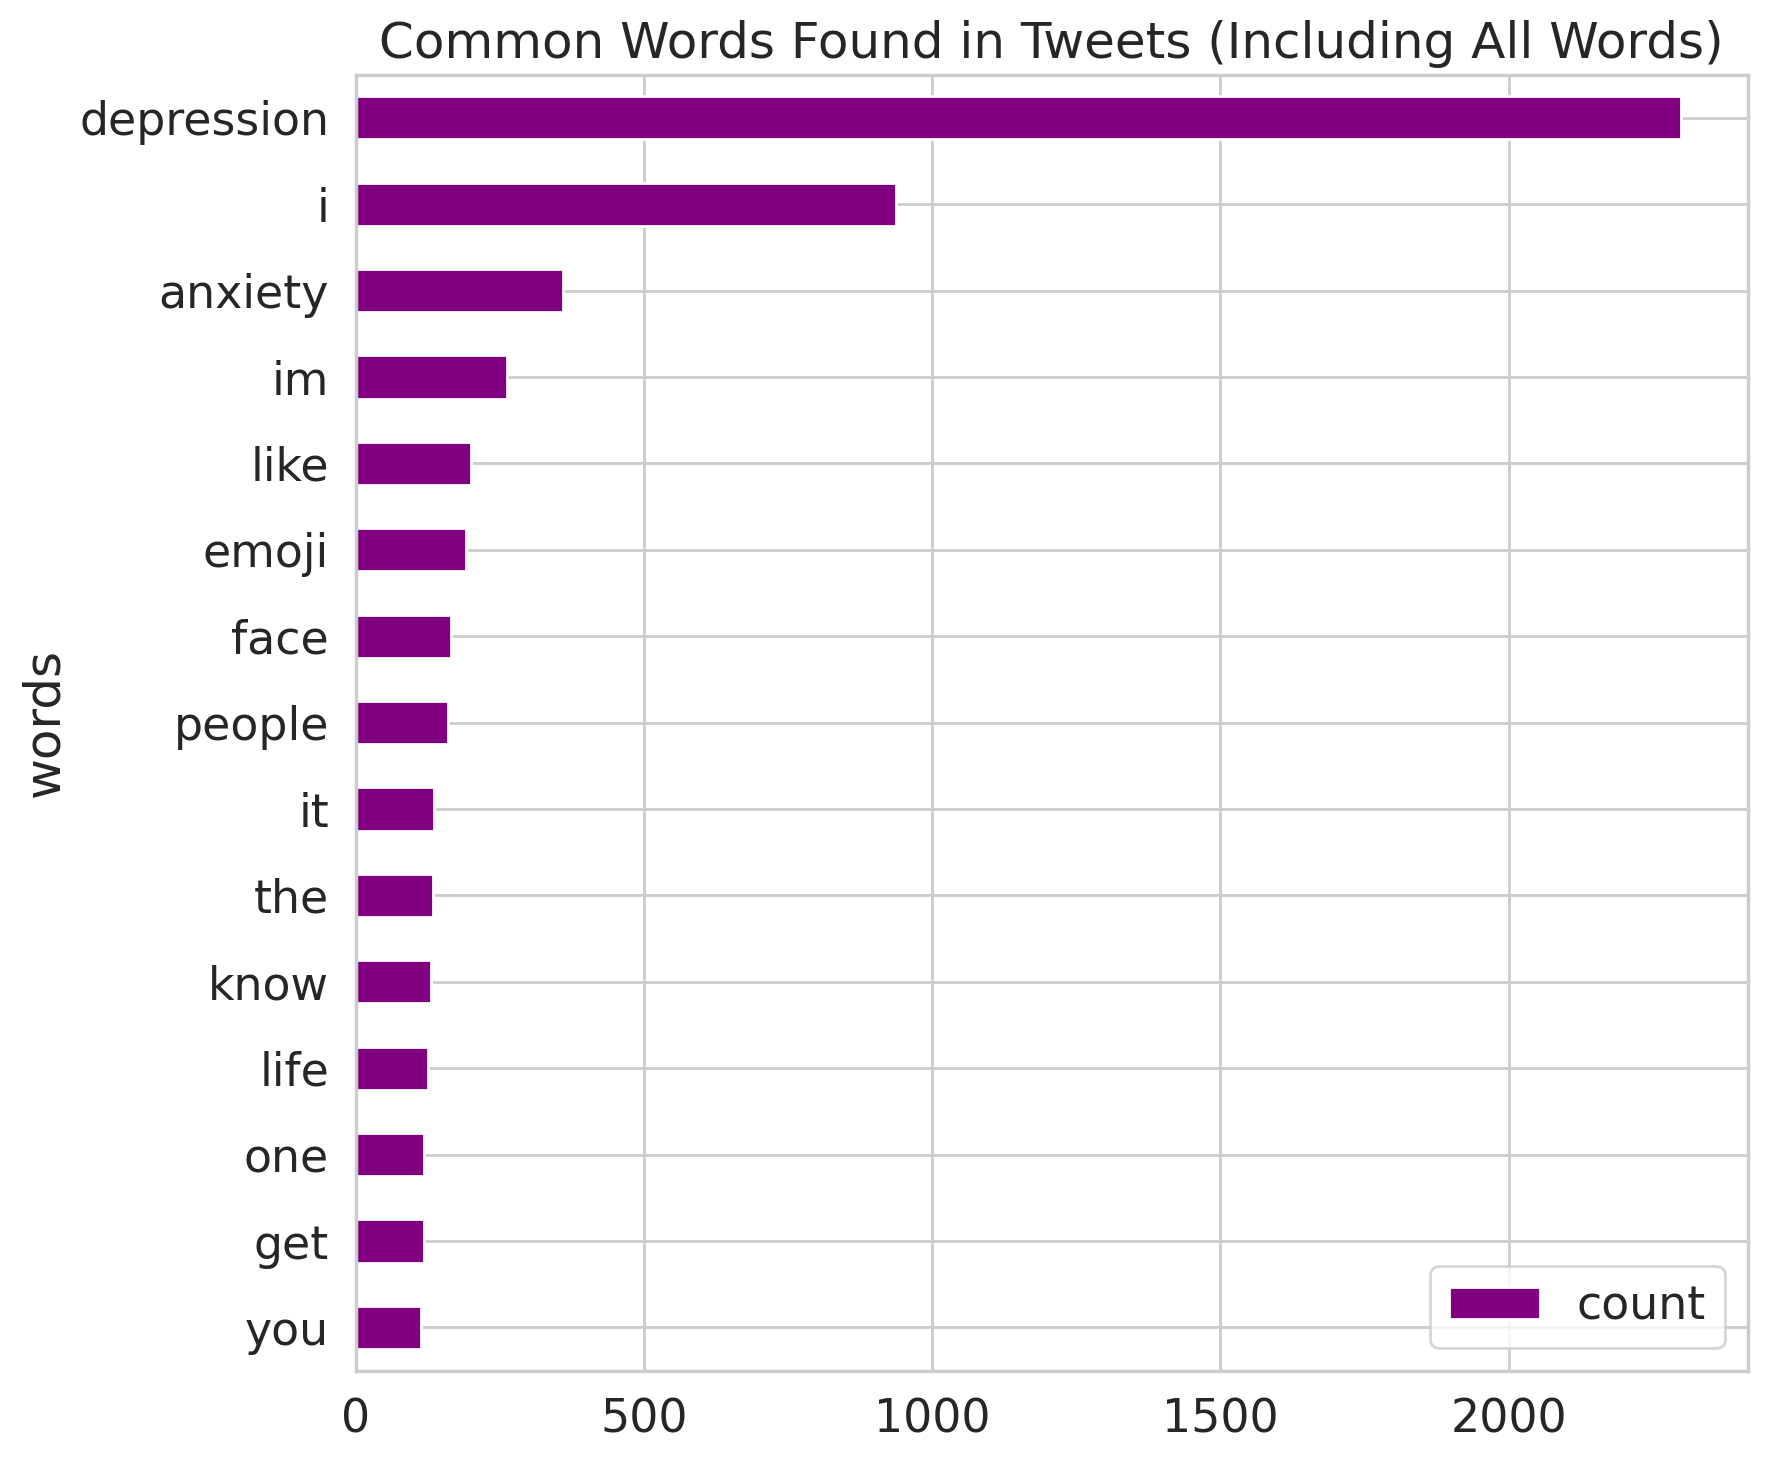

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()


In [ ]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['o', 'with', 'ma', 'have', 'just', 'where', 'hers', 'if', 'those', 'shan']

In [ ]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('depression', 2299),
 ('anxiety', 360),
 ('im', 263),
 ('like', 201),
 ('emoji', 192),
 ('face', 165),
 ('people', 161),
 ('know', 131),
 ('life', 125),
 ('get', 118),
 ('one', 118),
 ('mental', 110),
 ('feel', 99),
 ('time', 95),
 ('help', 90)]

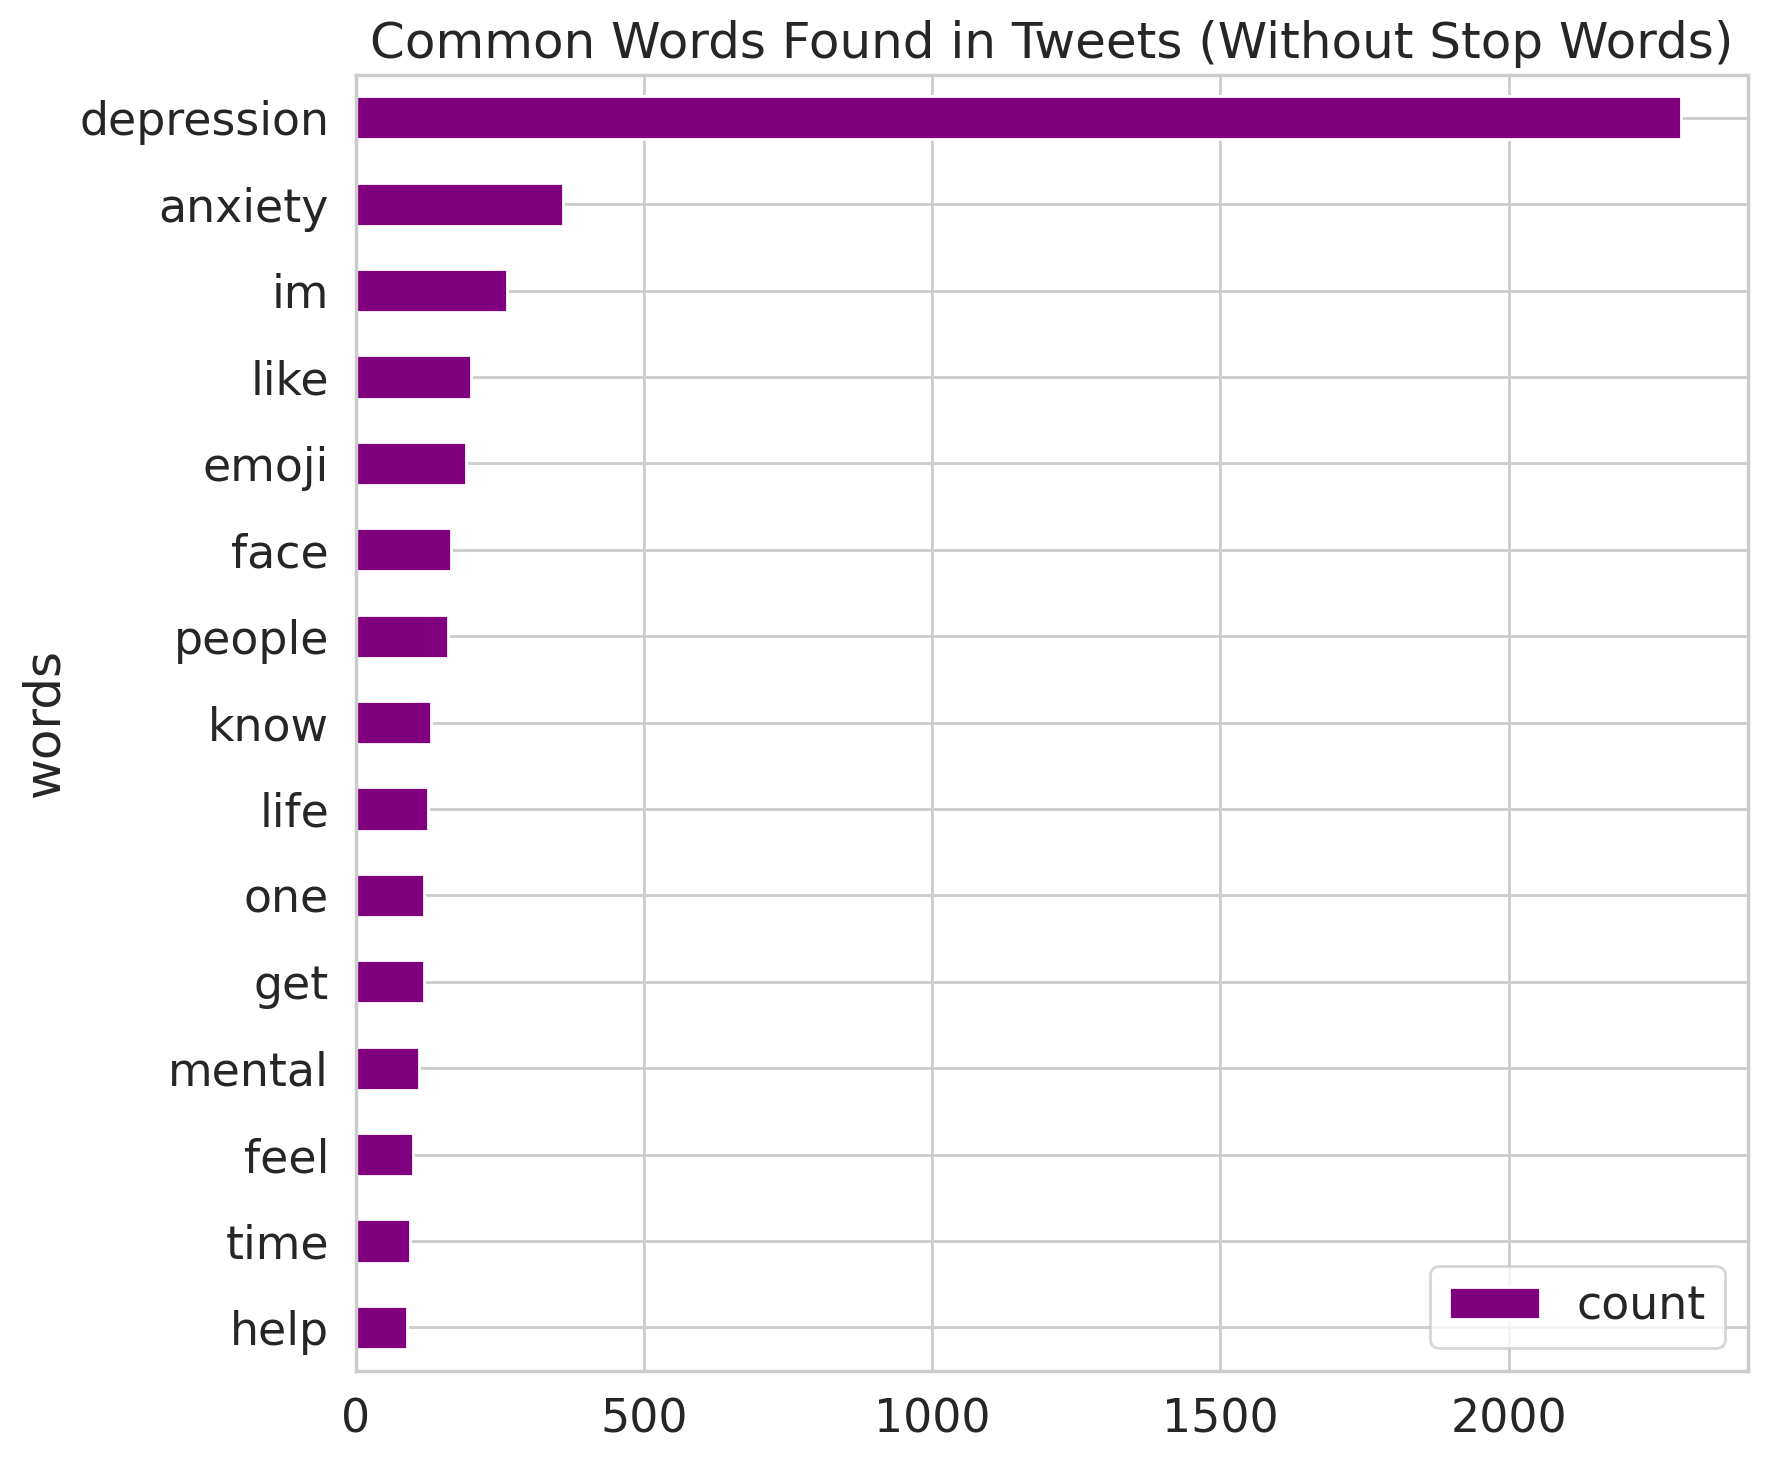

In [ ]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [ ]:
tweets_nsw[0]


['lack',
 'understanding',
 'small',
 'significant',
 'part',
 'causes',
 'anxiety',
 'depression',
 'feel',
 'incredibly',
 'lonely',
 'soooo',
 'easy',
 'compare',
 'easy',
 'invalidate']

In [ ]:

all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))


counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('depression', 2299),
 ('anxiety', 360),
 ('emoji', 192),
 ('face', 165),
 ('people', 161),
 ('know', 131),
 ('life', 125),
 ('get', 118),
 ('mental', 110),
 ('feel', 99),
 ('time', 95),
 ('help', 90),
 ('health', 90),
 ('go', 90),
 ('really', 86)]

In [ ]:

bigrams = list(itertools.chain(*terms_bigram))


bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('anxiety', 'depression'), 137),
 (('depression', 'anxiety'), 137),
 (('mental', 'health'), 55),
 (('great', 'depression'), 33),
 (('loudly', 'crying'), 33),
 (('mental', 'illness'), 31),
 (('moms', 'depression'), 31),
 (('depression', 'tied'), 31),
 (('tied', 'kids'), 31),
 (('kids', 'emotional'), 31),
 (('emotional', 'intellectual'), 31),
 (('intellectual', 'development'), 31),
 (('heavy', 'red'), 30),
 (('depression', 'emoji'), 29),
 (('smiling', 'face'), 29),
 (('risk', 'depression'), 26),
 (('emoji', 'face'), 25),
 (('depression', 'nap'), 25),
 (('face', 'tears'), 24),
 (('cured', 'depression'), 23)]

In [ ]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(anxiety, depression)",137
1,"(depression, anxiety)",137
2,"(mental, health)",55
3,"(great, depression)",33
4,"(loudly, crying)",33
5,"(mental, illness)",31
6,"(moms, depression)",31
7,"(depression, tied)",31
8,"(tied, kids)",31
9,"(kids, emotional)",31


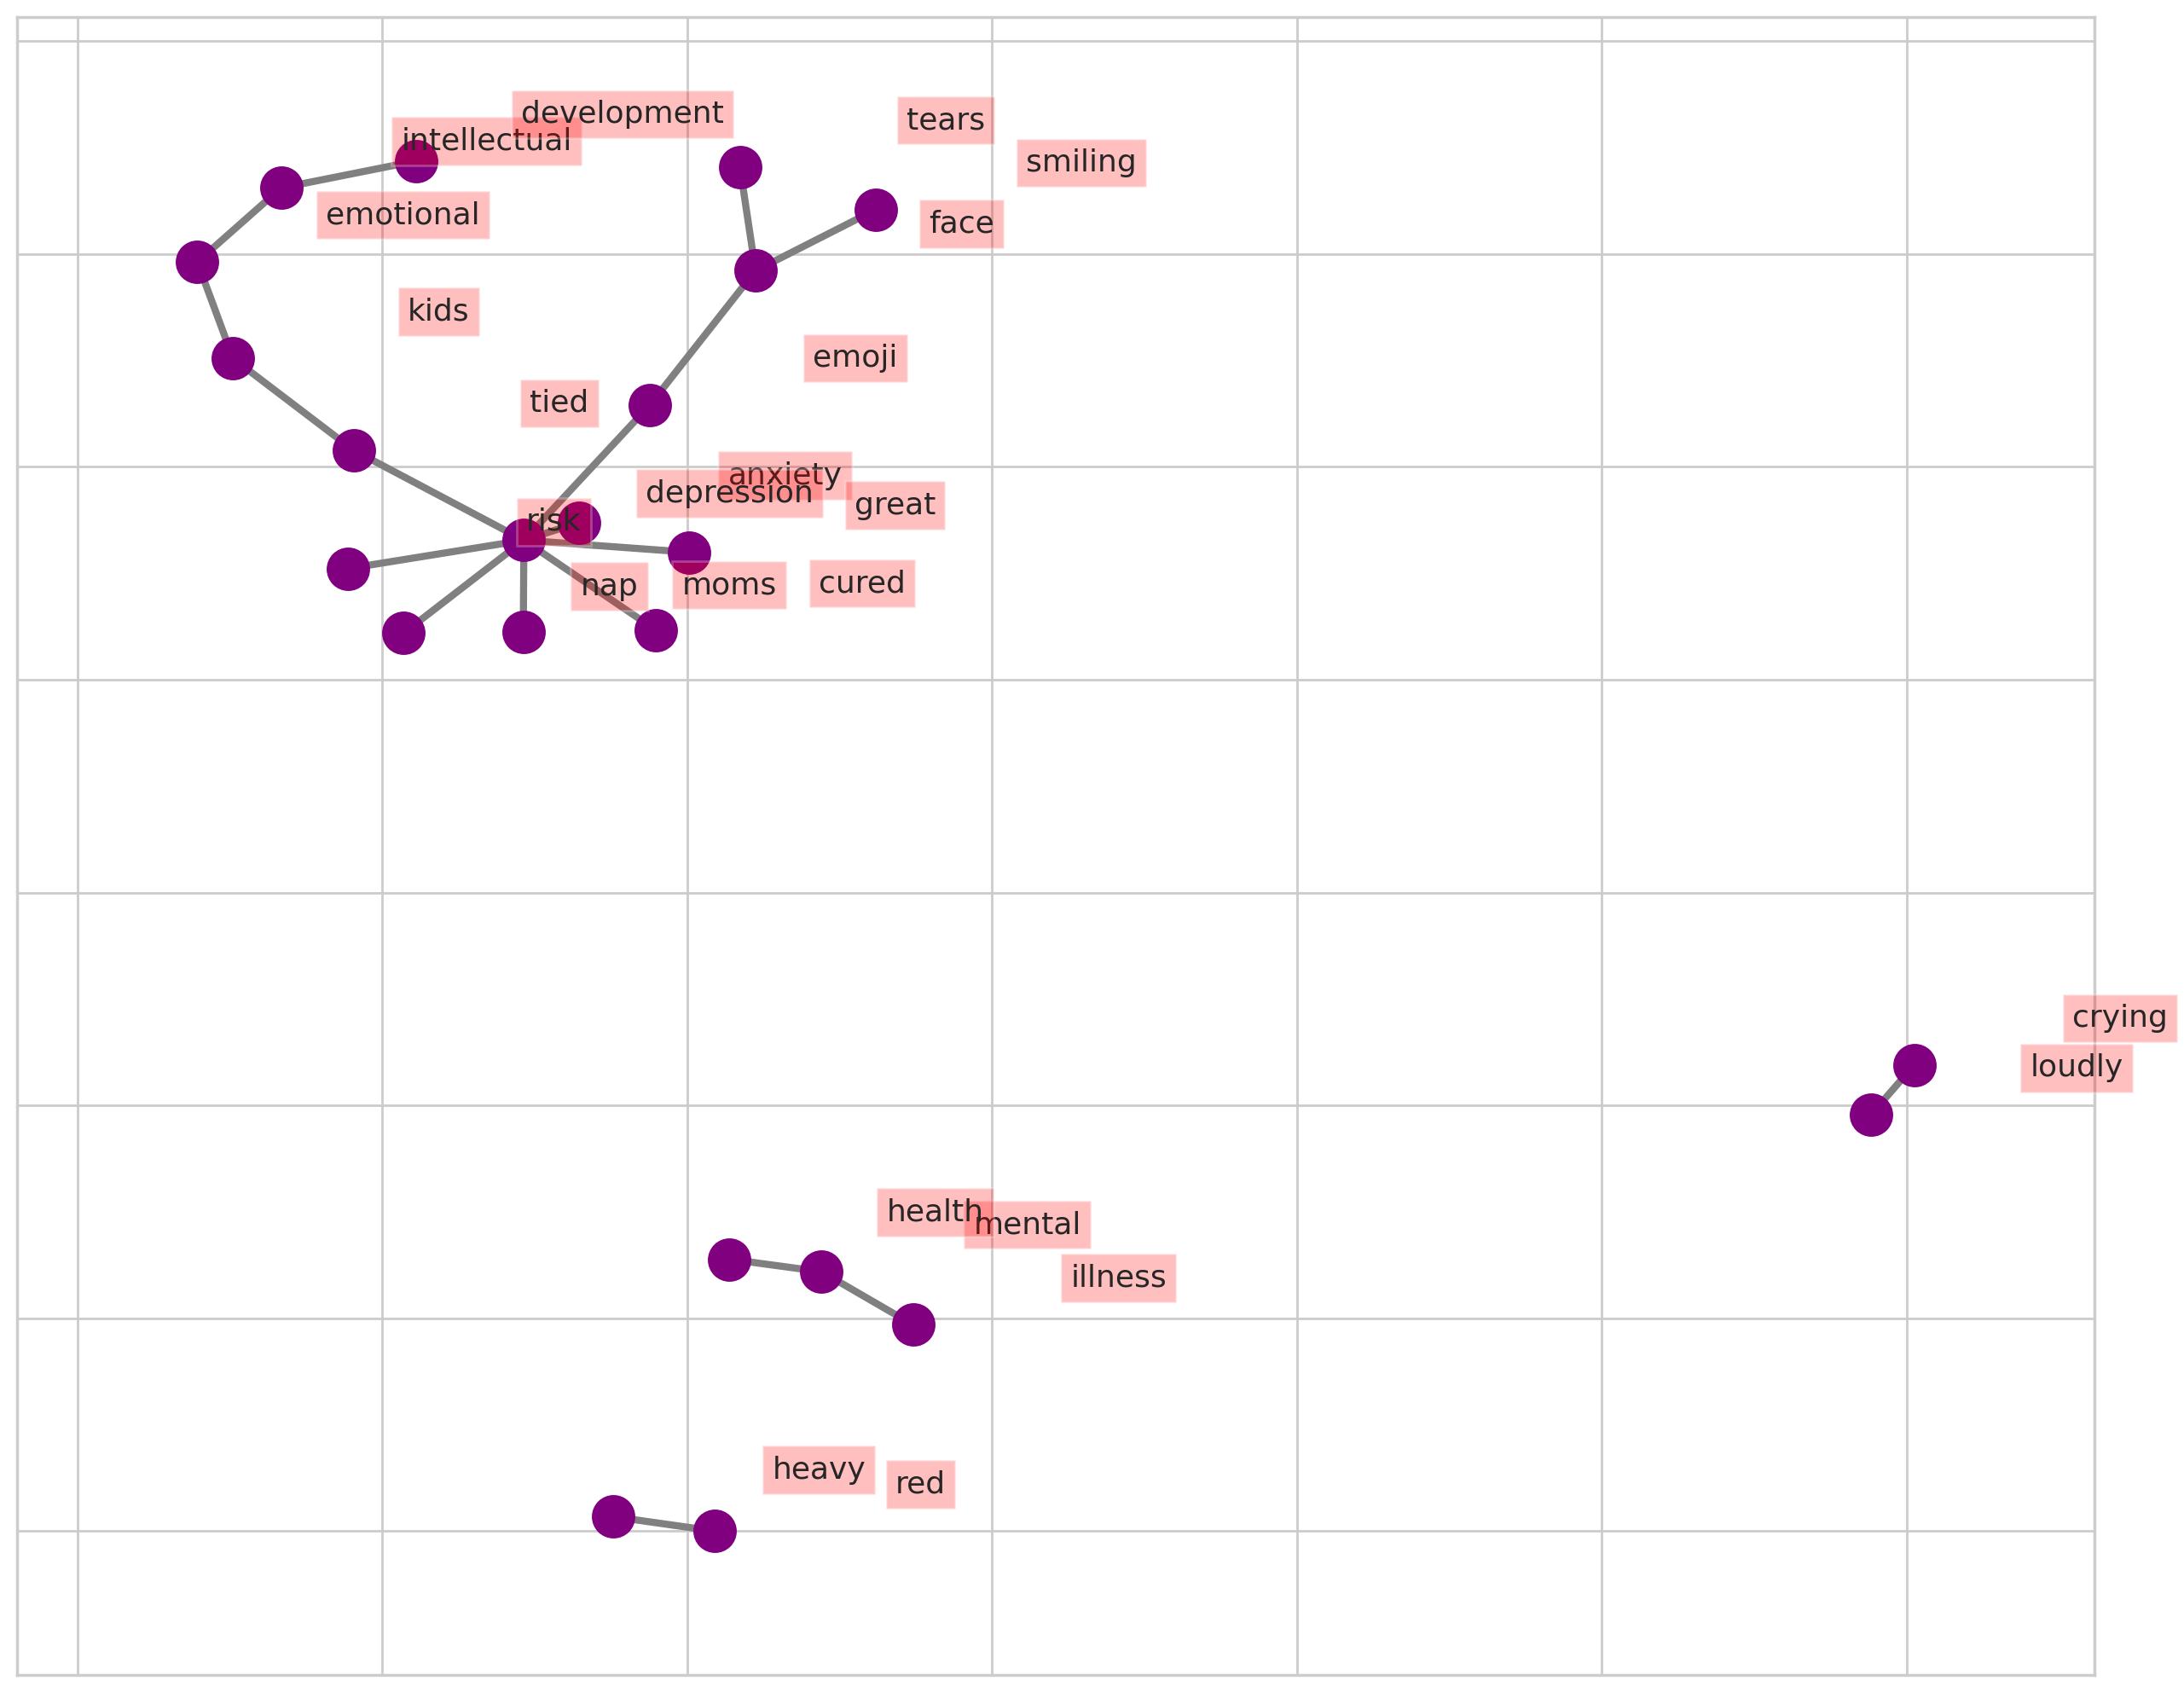

In [ ]:

d = bigram_df.set_index('bigram').T.to_dict('records')

G = nx.Graph()


for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(14, 12))

pos = nx.spring_layout(G, k=1)


nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)


for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)

plt.show()

In [ ]:
train = pd.read_csv(DEPRESSIVE_TWEETS_CSV, sep = '|', header = None, usecols = range(0,9), nrows = DEPRES_NROWS)

In [ ]:
train.head()

,0,1,2,3,4,5,6,7,8
0,989292962323615744,2018-04-25,23:59:57,Eastern Standard Time,whosalli,The lack of this understanding is a small but ...,1,0,3
1,989292959844663296,2018-04-25,23:59:56,Eastern Standard Time,estermnunes,i just told my parents about my depression and...,1,0,2
2,989292951716155392,2018-04-25,23:59:54,Eastern Standard Time,TheAlphaAries,depression is something i don't speak about ev...,0,0,0
3,989292873664393218,2018-04-25,23:59:35,Eastern Standard Time,_ojhodgson,Made myself a tortilla filled with pb&j. My de...,1,0,0
4,989292856119472128,2018-04-25,23:59:31,Eastern Standard Time,DMiller96371630,@WorldofOutlaws I am gonna need depression med...,0,0,0


In [ ]:
train['word_count'] = train[5].apply(lambda x: int(len(str(x).split(" "))))
train[[5,'word_count']].head()

,5,word_count
0,The lack of this understanding is a small but ...,37
1,i just told my parents about my depression and...,43
2,depression is something i don't speak about ev...,51
3,Made myself a tortilla filled with pb&j. My de...,13
4,@WorldofOutlaws I am gonna need depression med...,31


In [ ]:
train['char_count'] = train[5].str.len() ## this also includes spaces
train[[5,'char_count']].head()

,5,char_count
0,The lack of this understanding is a small but ...,215.0
1,i just told my parents about my depression and...,204.0
2,depression is something i don't speak about ev...,264.0
3,Made myself a tortilla filled with pb&j. My de...,86.0
4,@WorldofOutlaws I am gonna need depression med...,196.0


In [ ]:
char_count.mean()

157.68136619109382

(0.0, 300.0)

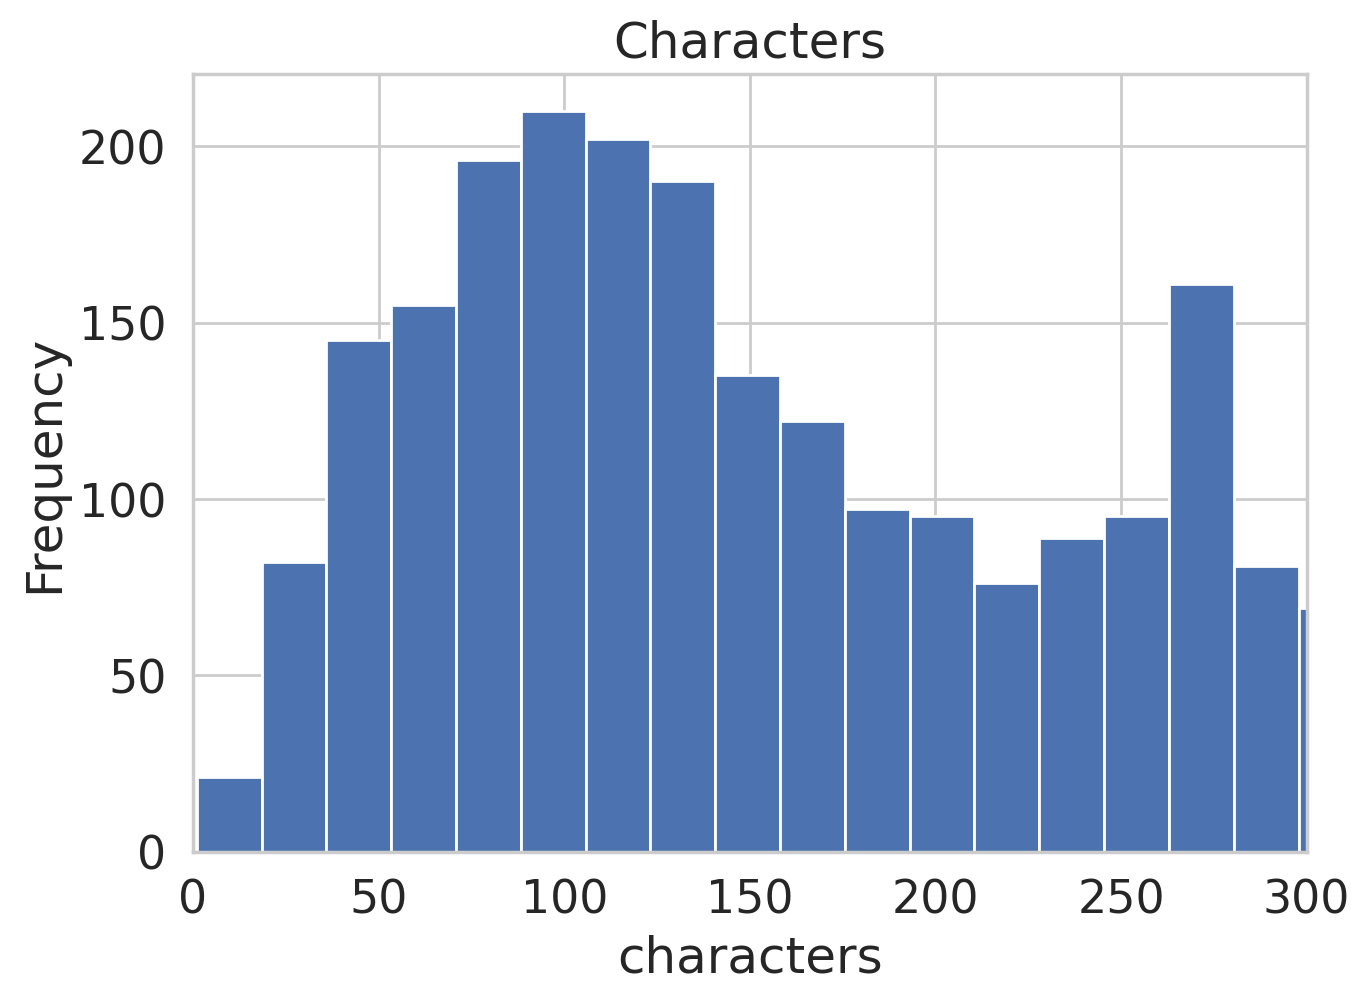

In [ ]:
# Plot Histogram on x
x = char_count
plt.hist(x, bins=50)
plt.gca().set(title='Characters', ylabel='Frequency', xlabel='characters');
plt.xlim(0, 300)

(0.0, 100.0)

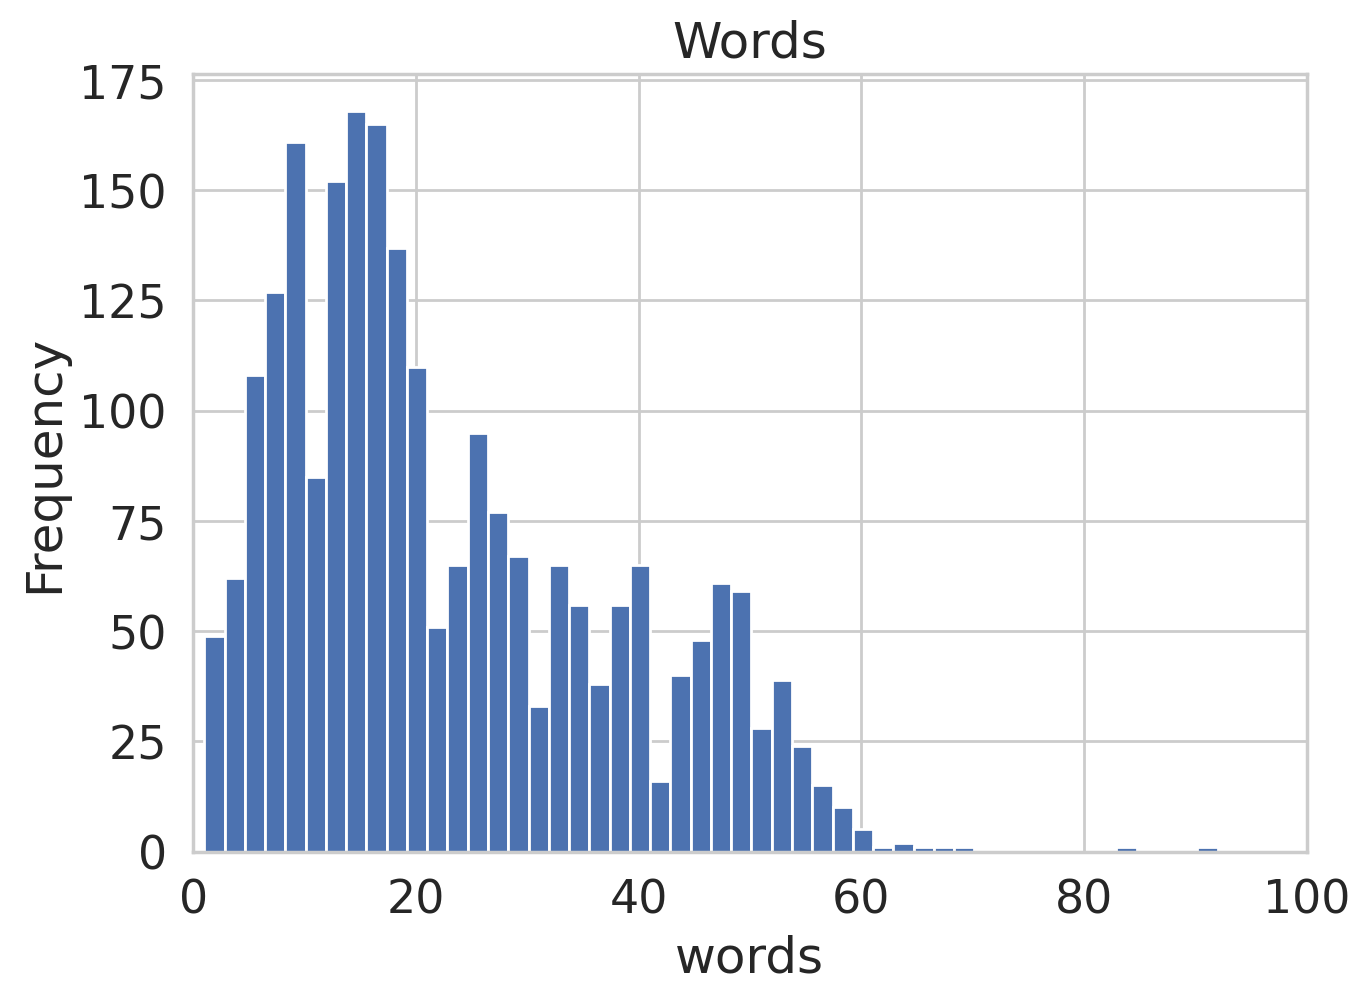

In [ ]:
# Plot Histogram on x
x = word_counts
plt.hist(x, bins=50)
plt.gca().set(title='Words', ylabel='Frequency', xlabel='words');
plt.xlim(0, 100)